#### Dataset Link : https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

- DD Data Link : https://github.com/datasciencedojo/datasets/blob/master/titanic.csv
- DD Data Description Link : https://www.kaggle.com/c/titanic/data


### Installing Dependency

In [ ]:
!pip3 install numpy
!pip3 install pandas
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install sklearn

### Importing Modules

In [2]:
import numpy as NP
import pandas as PD
import seaborn as SNS
import matplotlib.pyplot as MPLOT
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_absolute_error


---

# Reading the Dataset


- Import Dataset


In [23]:
DF = PD.read_csv(
    "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
)
DF.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
510,511,1,3,"Daly, Mr. Eugene Patrick",male,29.0,0,0,382651,7.7500,NaN,Q
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
247,248,1,2,"Hamalainen, Mrs. William (Anna)",female,24.0,0,2,250649,14.5000,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
689,690,1,1,"Madill, Miss. Georgette Alexandra",female,15.0,0,1,24160,211.3375,B5,S
571,572,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0000,B96 B98,S
388,389,0,3,"Sadlier, Mr. Matthew",male,NaN,0,0,367655,7.7292,NaN,Q


### Basic Information about Data :


| Variable |	Definition|	Key|
|---|---|---|
| survival |	Survival|	0 = No, 1 = Yes|
| pclass |	Ticket class|	1 = 1st, 2 = 2nd, 3 = 3rd|
| sex |	Sex	||
| Age |	Age in years	||
| sibsp |	# of siblings / spouses aboard the Titanic	||
| parch |	# of parents / children aboard the Titanic	||
| ticket |	Ticket number	||
| fare |	Passenger fare	||
| cabin |	Cabin number	||
| embarked |	Port of Embarkation |	C = Cherbourg, Q = Queenstown, S = Southampton|



### Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

---

# Finding Missing Values


- Checking the size and Shape of data


In [24]:
print("Shape :", DF.shape)
print("Size :", DF.size)

Shape : (891, 12)
Size : 10692


- Getting Datatype of Columns (Data Frame)


In [25]:
DF.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

- Data Summary of Dataset


In [26]:
DF.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Checking for N/A Values


In [27]:
DF.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Checking for NULL Values


In [28]:
DF.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

---

# Visualize Data without Preprocessing

- Overall Survived Plot

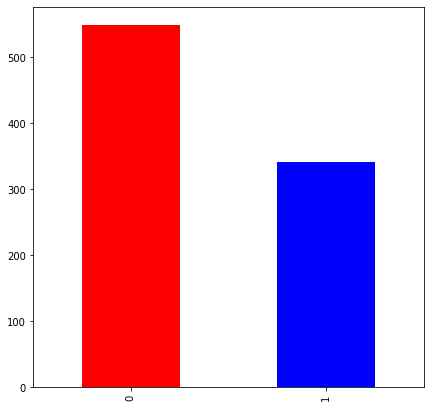

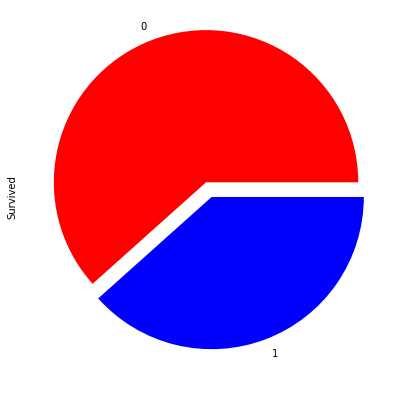

In [42]:
#For Bar Chart
fig, ax = MPLOT.subplots(figsize=(7,7))
DF["Survived"].value_counts().plot.bar(color= ["red","blue"])
MPLOT.show()

#For Pie Chart
fig, ax = MPLOT.subplots(figsize=(7,7))
DF["Survived"].value_counts().plot.pie(colors= ["red","blue"],explode=[0.1,0.003])
MPLOT.show()

---

# Removing Unwanted Columns

- Here the Cabin has many missing values also it is unwanted

In [ ]:
DF = DF.drop(["Cabin"], axis = 1)
DF.sample(5)

---

# Finding the Marital Status of Passengers from name


In [43]:
Suffix_Arr = []
for i in range(len(DF)):
    if   "Mr." in DF["Name"][i]: Suffix_Arr.append("Mr.")
    elif "Ms." in DF["Name"][i]: Suffix_Arr.append("Ms.")
    elif "Mrs." in DF["Name"][i]: Suffix_Arr.append("Mrs.")
    elif "Miss." in DF["Name"][i]: Suffix_Arr.append("Miss.")
    elif "Master." in DF["Name"][i]: Suffix_Arr.append("Master.")
    elif "Don." in DF["Name"][i]: Suffix_Arr.append("Don.")
    elif "Rev." in DF["Name"][i]: Suffix_Arr.append("Rev.")
    elif "Mme." in DF["Name"][i]: Suffix_Arr.append("Mme.")
    elif "Major." in DF["Name"][i]: Suffix_Arr.append("Major.")
    elif "Dr." in DF["Name"][i]: Suffix_Arr.append("Dr.")
    elif "Mme." in DF["Name"][i]: Suffix_Arr.append("Mme.")
    elif "Lady." in DF["Name"][i]: Suffix_Arr.append("Lady.")
    elif "Sir." in DF["Name"][i]: Suffix_Arr.append("Sir.")
    elif "Col." in DF["Name"][i]: Suffix_Arr.append("Col.")
    elif "Mlle." in DF["Name"][i]: Suffix_Arr.append("Mlle.")
    elif "Capt." in DF["Name"][i]: Suffix_Arr.append("Capt.")
    elif "Countess." in DF["Name"][i]: Suffix_Arr.append("Countess.")
    elif "Jonkheer." in DF["Name"][i]: Suffix_Arr.append("Jonkheer.")
    else : 
        print(DF["Name"][i])

DF["Name_Suffix"] = Suffix_Arr
DF.sample(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Suffix
551,552,0,2,"Sharp, Mr. Percival James R",male,27.00,0,0,244358,26.0000,NaN,S,Mr.
398,399,0,2,"Pain, Dr. Alfred",male,23.00,0,0,244278,10.5000,NaN,S,Dr.
464,465,0,3,"Maisner, Mr. Simon",male,NaN,0,0,A/S 2816,8.0500,NaN,S,Mr.
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.00,1,2,113760,120.0000,B96 B98,S,Miss.
537,538,1,1,"LeRoy, Miss. Bertha",female,30.00,0,0,PC 17761,106.4250,NaN,C,Miss.
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C,Master.
160,161,0,3,"Cribb, Mr. John Hatfield",male,44.00,0,1,371362,16.1000,NaN,S,Mr.
569,570,1,3,"Jonsson, Mr. Carl",male,32.00,0,0,350417,7.8542,NaN,S,Mr.
143,144,0,3,"Burke, Mr. Jeremiah",male,19.00,0,0,365222,6.7500,NaN,Q,Mr.
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C,Miss.


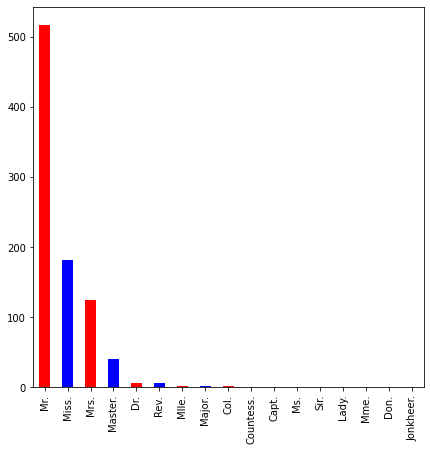

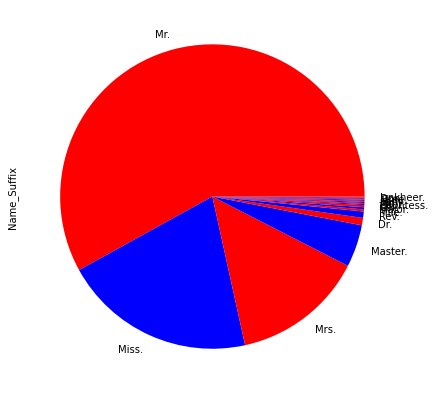

In [45]:
#For Bar Chart
fig, ax = MPLOT.subplots(figsize=(7,7))
DF["Name_Suffix"].value_counts().plot.bar(color= ["red","blue"])
MPLOT.show()

#For Pie Chart
fig, ax = MPLOT.subplots(figsize=(7,7))
DF["Name_Suffix"].value_counts().plot.pie(colors= ["red","blue"])
MPLOT.show()

In [ ]:
DF["Age"] = DF["Age"].fillna(-0.5)
bins = [-1, 0, 14, 25, 35, 60, NP.inf]
labels = ['Unknown', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
DF['AgeGroup'] = PD.cut(DF["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
SNS.barplot(x="AgeGroup", y="Survived", data=DF)
plt.show()

In [ ]:
#P